In [171]:
from scipy.stats import norm, t
import numpy as np
import matplotlib.pyplot as plt
from mlpeople.statistic import (
    z_test,
    z_test_summary,
    t_test_for_sample,
    t_test_summary,
    plot_z_vs_t,
)

In [ ]:
# import importlib
# import mlpeople.statistic.hypothesis_tests as mlpeople_statistic_hypothesis_tests
# importlib.reload(mlpeople_statistic_hypothesis_tests)

# import importlib
# import mlpeople.statistic as mlpeople_statistic
# importlib.reload(mlpeople_statistic)

<module 'mlpeople.statistic' from '/Users/maksymstefanko/ML/ML-love/data-loves-ml-for-people-course/src/mlpeople/statistic/__init__.py'>

# Define population

Define population IQ scores with mean of 100 and a standard deviation (SD) of 15. 

In [82]:
seed_value = 22
rng = np.random.default_rng(seed_value)

population = rng.normal(loc=100, scale=15, size=2000)
population_mean = np.mean(population)
population_std = np.std(population)
print(f'population mean:{population_mean}')
print(f'population std:{population_std}')

population mean:100.07741834290528
population std:14.649175366401211


# Smart People Sample

Group of people that have average IQ score 110 but a bit greater SD than in population

In [80]:
sample_1 = rng.normal(loc=110, scale=20, size=25)

## Z-test

Test if sample IQ scores significantly greater than population ones

In [84]:
sample_1_z_score, sample_1_z_test_p_value = z_test(np.mean(sample_1), population_mean, population_std, len(sample_1), two_sided=False)
(sample_1_z_score, sample_1_z_test_p_value)

(np.float64(3.4563779157084684), np.float64(0.00027374357434140073))

Sample size: 25
Sample mean: 110.2040
Population mean: 100.0774
Population std: 14.6492
z-statistic: 3.4564
p-value: 0.0003
Significance level α: 0.05
Result: Reject the null hypothesis (H0). The sample mean is significantly different from 100.07741834290528.


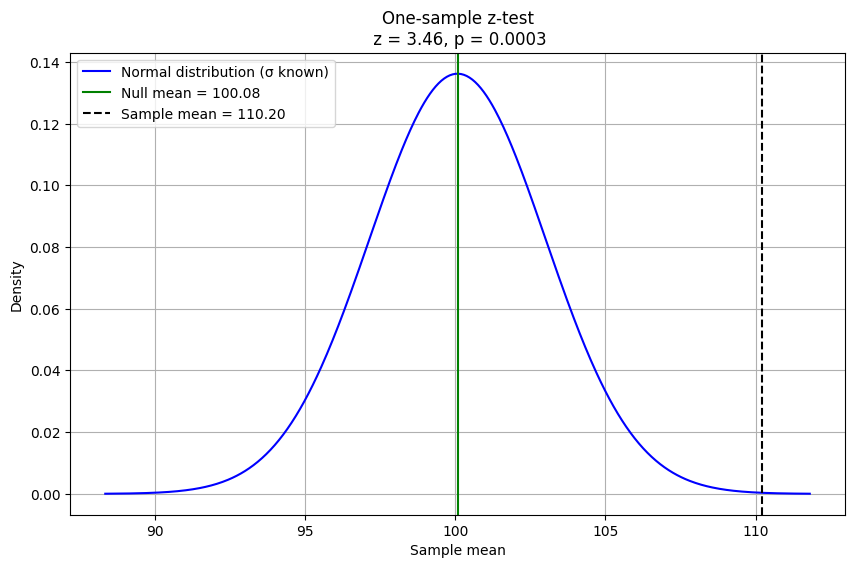

In [83]:
z_test_summary(sample_1, population_mean, population_std, two_sided=False, plot=True);

## T-test

Now, let's imagine we work with population with unknown std and want to test if sample mean is significantly greater than 100

In [86]:
sample_1_t_score, sample_1_t_test_p_value, sample_1_mean, sample_1_std = t_test_for_sample(sample_1, 100, two_sided=False)
(sample_1_z_score, sample_1_t_test_p_value)

(np.float64(3.4563779157084684), np.float64(0.012695683113114753))

Sample size: 25
Sample mean: 110.2040
Sample standard deviation: 21.4025
Null hypothesis mean: 100.0000
t-statistic: 2.3838
p-value: 0.0127
Significance level α: 0.05
Result: Reject the null hypothesis (H0). The sample mean is significantly different from 100.


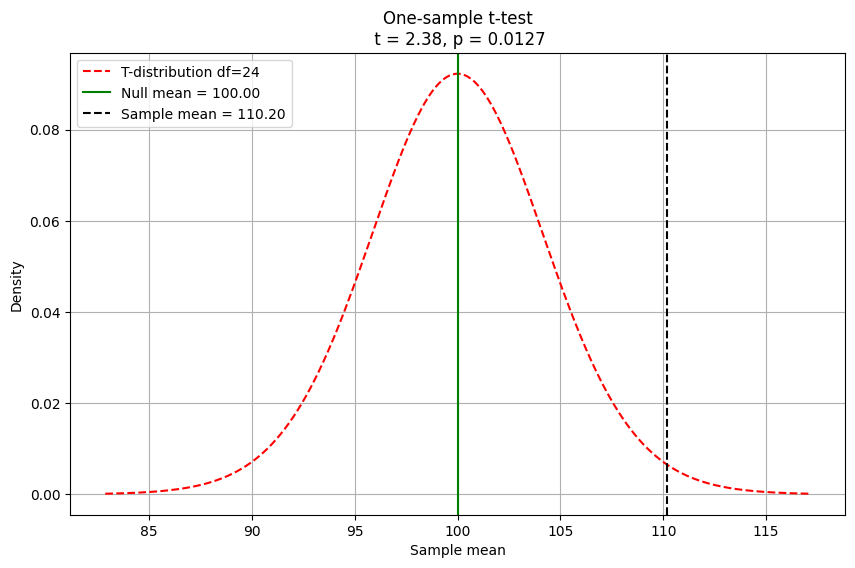

In [87]:
t_test_summary(sample_1, 100, two_sided=False, plot=True);

# High variance sample
Define sample with mean close to population mean but much greater variance (standard deviation).

In [120]:
sample_2 = rng.normal(loc=101, scale=30, size=100)
# sample_2[sample_2 < 20] = 20

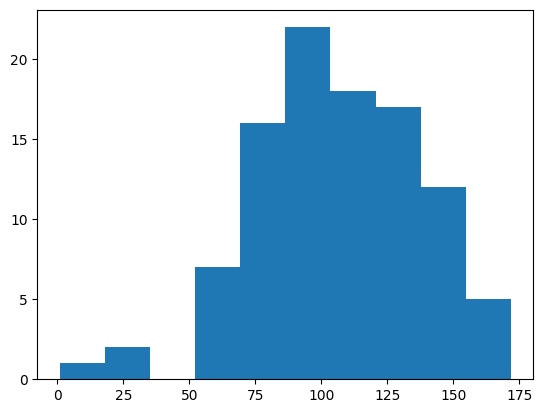

In [121]:
plt.hist(sample_2);

## Z-test
check if sample is different from population.
two_sided=True - as we don't know for sure if it is less or greater

In [122]:
sample_2_z_score, sample_2_z_test_p_value = z_test(np.mean(sample_2), population_mean, population_std, len(sample_1), two_sided=True)
(sample_2_z_score, sample_2_z_test_p_value)

(np.float64(1.9082860635646417), np.float64(0.05635425326328547))

Sample size: 100
Sample mean: 105.6684
Population mean: 100.0774
Population std: 14.6492
z-statistic: 3.8166
p-value: 0.0001
Significance level α: 0.05
Result: Reject the null hypothesis (H0). The sample mean is significantly different from 100.07741834290528.


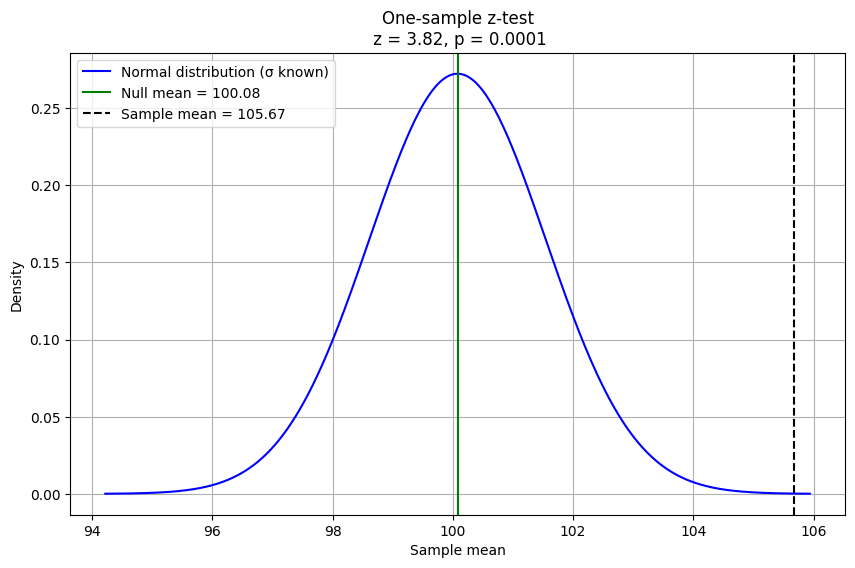

In [123]:
z_test_summary(sample_2, population_mean, population_std, two_sided=True, plot=True);

## T-test

Now, we don't know population standard deviation

Sample size: 100
Sample mean: 105.6684
Sample standard deviation: 31.2022
Null hypothesis mean: 100.0774
t-statistic: 1.7918
p-value: 0.0762
Significance level α: 0.05
Result: Fail to reject the null hypothesis (H0). No significant difference detected.


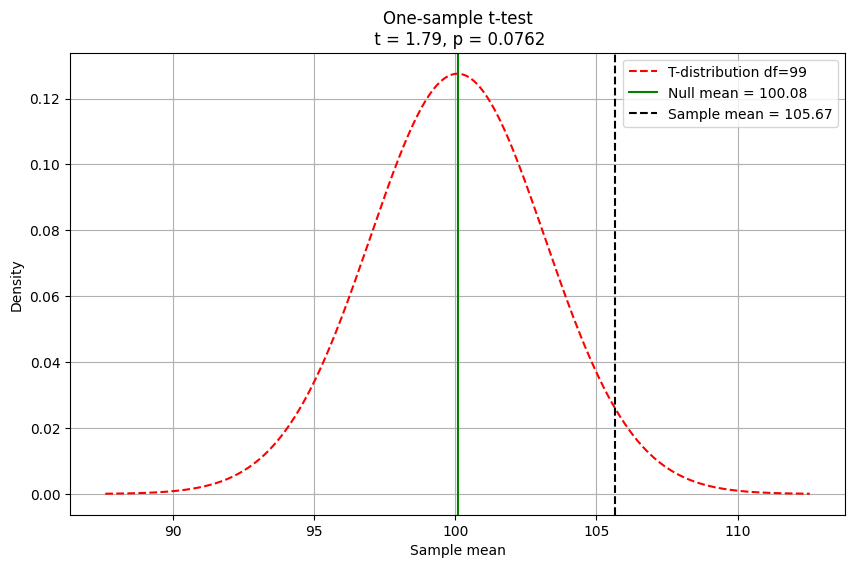

In [124]:
t_test_summary(sample_2, population_mean, two_sided=True, plot=True);

## Z-test vs T-test

t test failed to detect significant difference, z test did. Let's compare their result visually

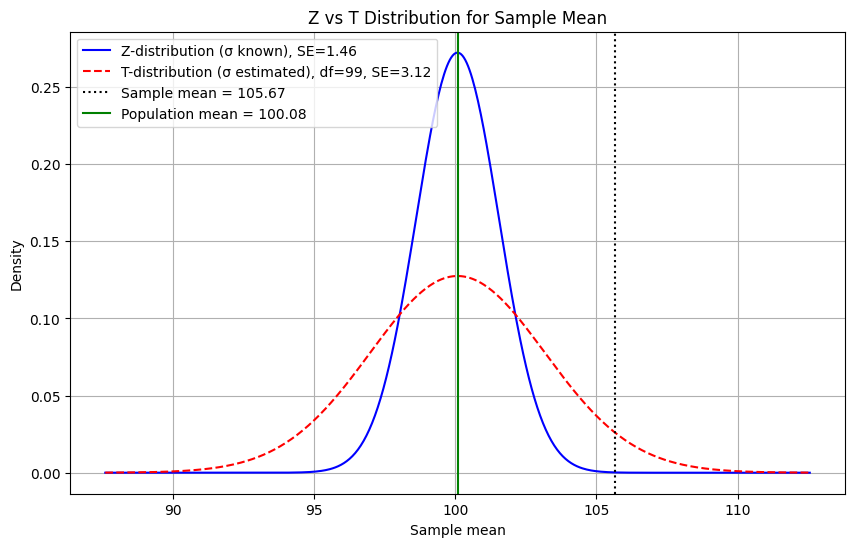

In [125]:
plot_z_vs_t(sample_2, population_mean, population_std)


# Random sample from population

Take random 30 elements from population and test if they different from population

In [126]:
sample_3 = rng.choice(population, size=30, replace=True)

Sample size: 30
Sample mean: 98.8796
Population mean: 100.0774
Population std: 14.6492
z-statistic: -0.4479
p-value: 0.6542
Significance level α: 0.05
Result: Fail to reject the null hypothesis (H0). No significant difference detected.


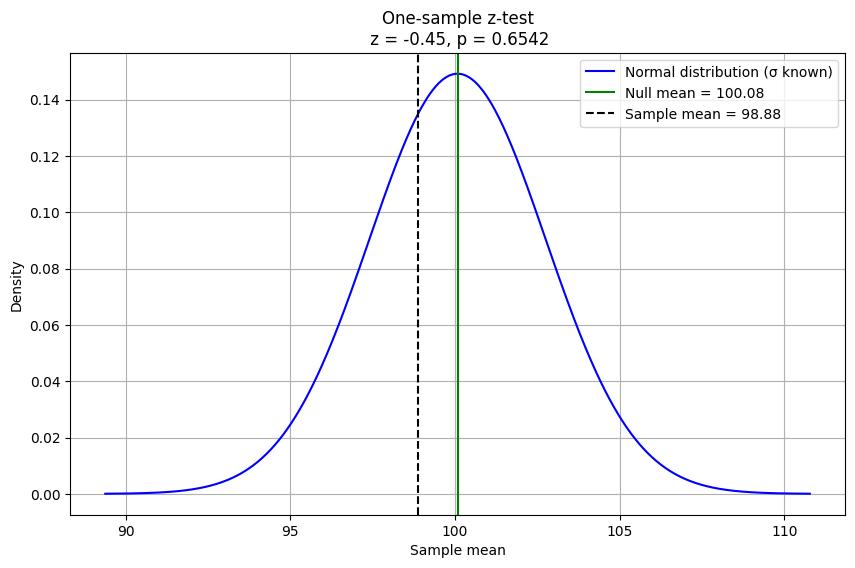

In [127]:
z_test_summary(sample_3, population_mean, population_std, two_sided=True, plot=True);

Sample size: 30
Sample mean: 98.8796
Sample standard deviation: 12.6099
Null hypothesis mean: 100.0774
t-statistic: -0.5203
p-value: 0.6068
Significance level α: 0.05
Result: Fail to reject the null hypothesis (H0). No significant difference detected.


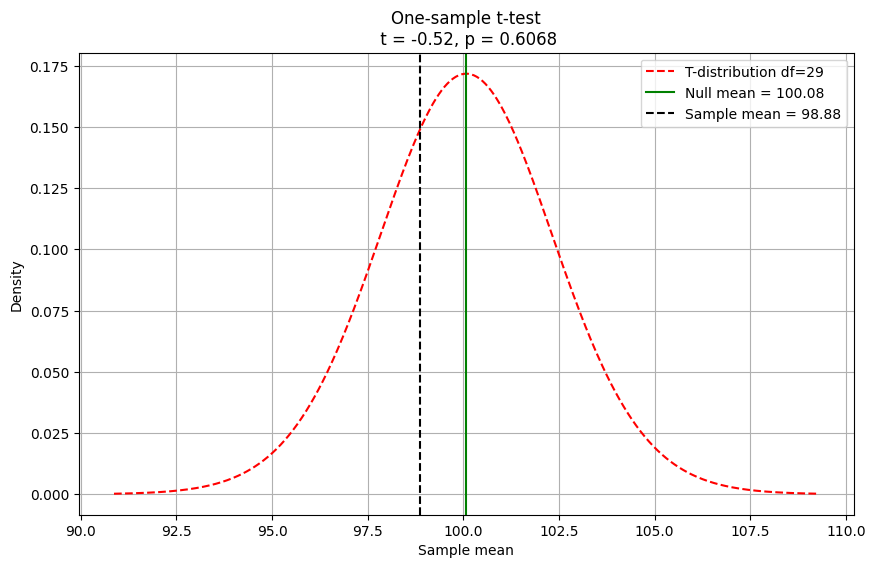

In [128]:
t_test_summary(sample_3, population_mean, two_sided=True, plot=True);

## Compare Z-test and T-test
This time both tests failed to reject the null hypothesis and did not find significant difference in sample (which is expected based on experiment details).
But let's again compare z-test and t-test visually and see how t-test has heavier tails because of uncertainty (unknown population variance)

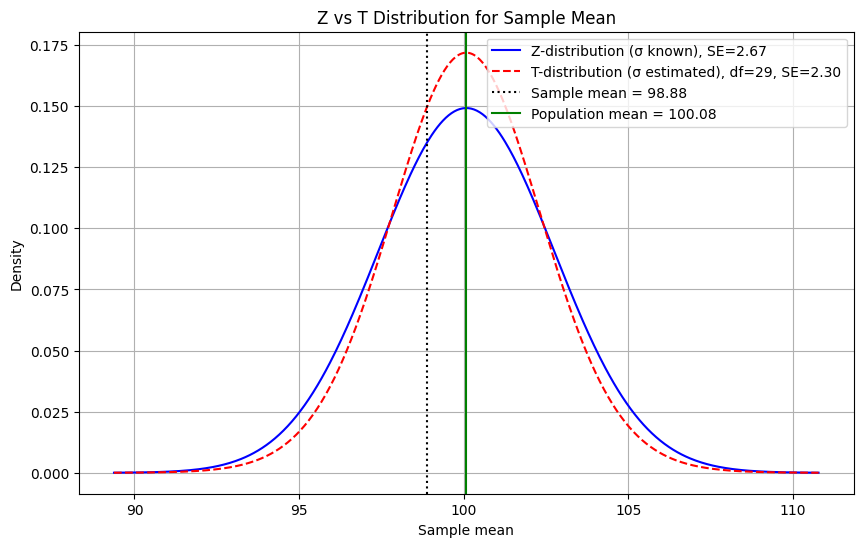

In [130]:
plot_z_vs_t(sample_3, population_mean, population_std)

# Small samples

## Small sample 1 - both fail

Define small sample and see that both tests Fail to reject the null hypothesis (H0) despite that sample mean is different from population (because of luck of evidence)

In [163]:
sample_4 = [90,95,96,100]

Sample size: 4
Sample mean: 95.2500
Population mean: 100.0774
Population std: 14.6492
z-statistic: -0.6591
p-value: 0.5099
Significance level α: 0.05
Result: Fail to reject the null hypothesis (H0). No significant difference detected.


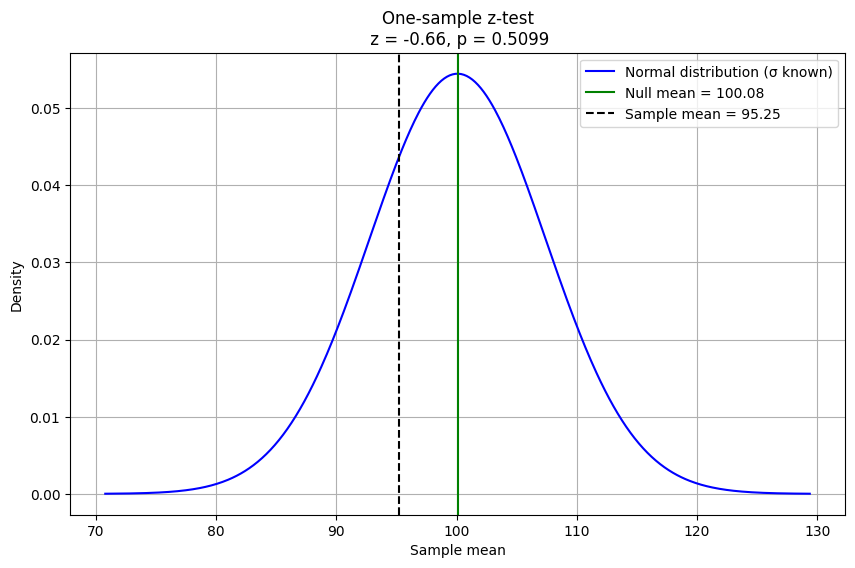

In [164]:
z_test_summary(sample_4, population_mean, population_std, two_sided=True, plot=True);

Sample size: 4
Sample mean: 95.2500
Sample standard deviation: 4.1130
Null hypothesis mean: 100.0774
t-statistic: -2.3474
p-value: 0.1005
Significance level α: 0.05
Result: Fail to reject the null hypothesis (H0). No significant difference detected.


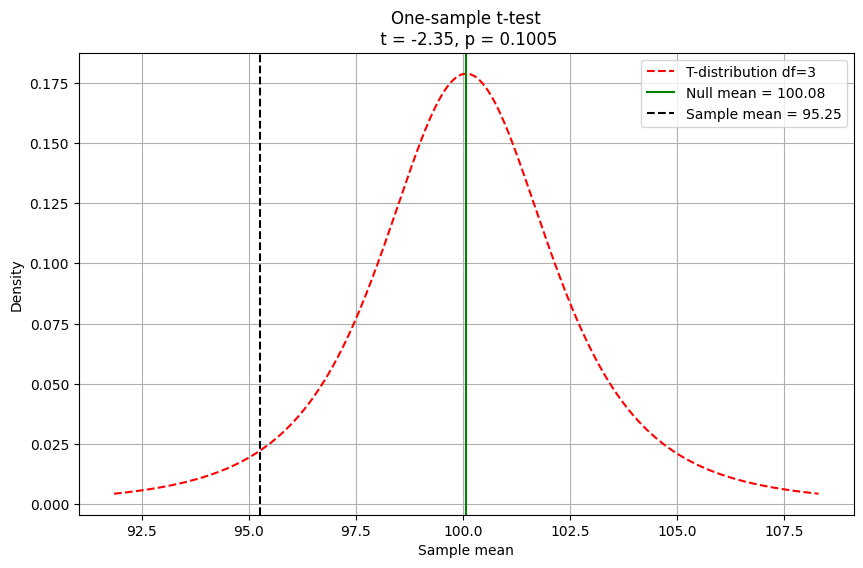

In [165]:
t_test_summary(sample_4, population_mean, two_sided=True, plot=True);

## Small sample 2 - ok for t-test, not ok for z-test
Now, let's see why using z-test with small samples is not recommended

Sample size: 7
Sample mean: 94.5714
Population mean: 100.0774
Population std: 14.6492
z-statistic: -0.9944
p-value: 0.3200
Significance level α: 0.05
Result: Fail to reject the null hypothesis (H0). No significant difference detected.


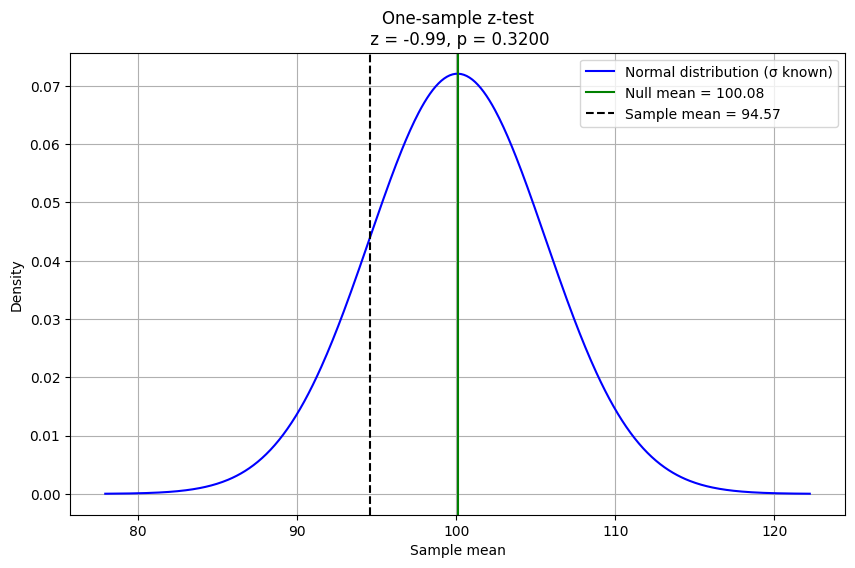

Sample size: 7
Sample mean: 94.5714
Sample standard deviation: 3.2587
Null hypothesis mean: 100.0774
t-statistic: -4.4704
p-value: 0.0042
Significance level α: 0.05
Result: Reject the null hypothesis (H0). The sample mean is significantly different from 100.07741834290528.


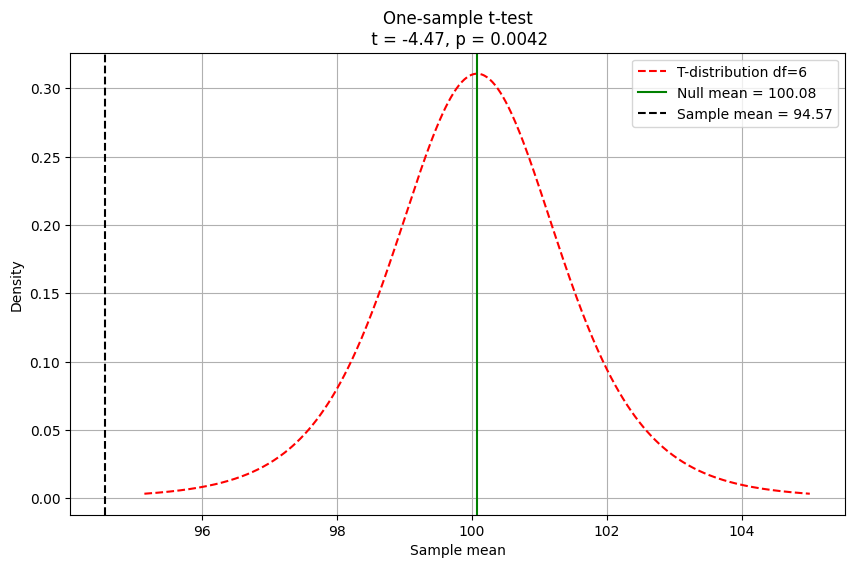

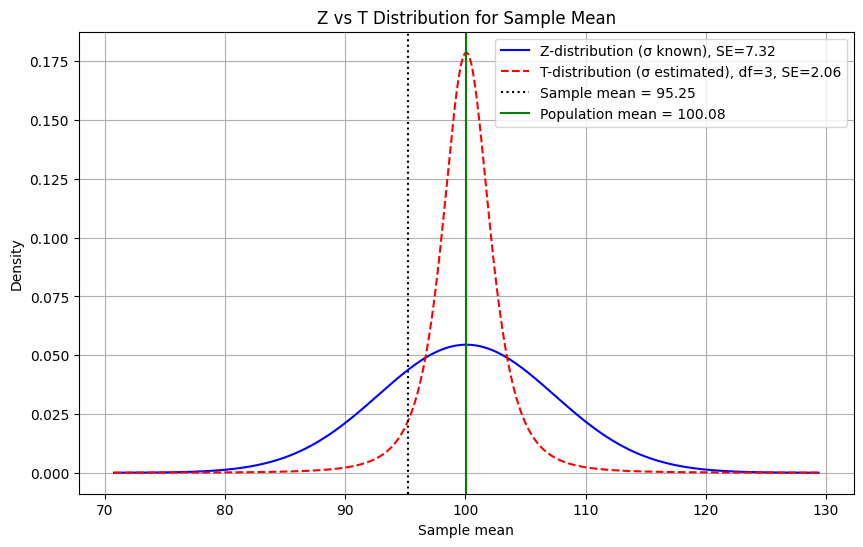

In [168]:
sample_5 = [90,92,93,95,96,96,100]
z_test_summary(sample_5, population_mean, population_std, two_sided=True, plot=True)
t_test_summary(sample_5, population_mean, two_sided=True, plot=True)
plot_z_vs_t(sample_4, population_mean, population_std);

# 2-sample tests

In [172]:
from mlpeople.statistic import (
    two_sample_z_test,
    two_sample_t_test
)

Generate two samples and test if they are significantly different. Compare z approximation and t distribution on t-test plot

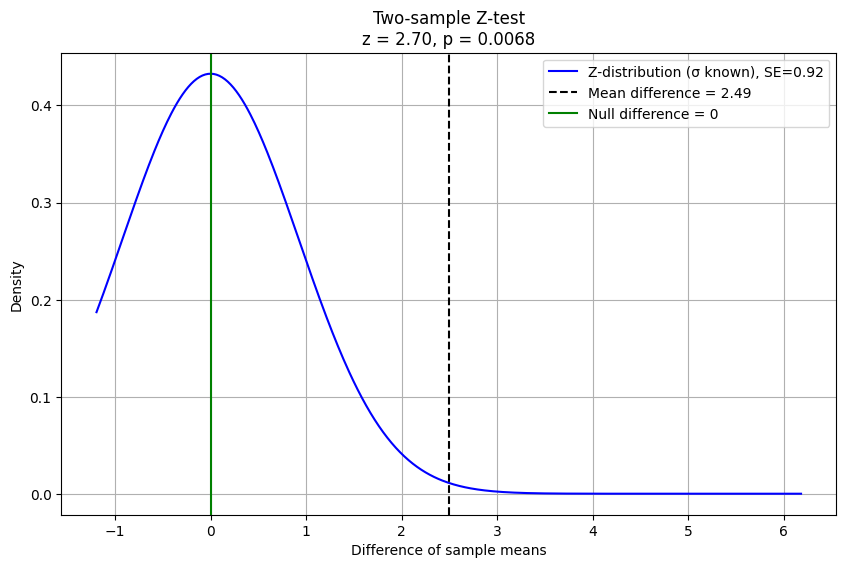

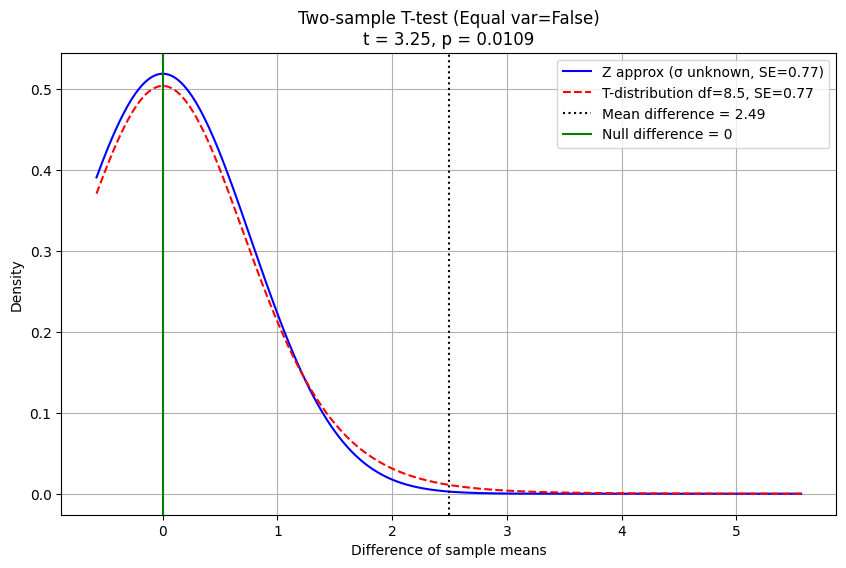

In [182]:

np.random.seed(42)
sample1 = np.random.normal(5, 2, 10)
sample2 = np.random.normal(4.7, 1.5, 5)

# Two-sample Z-test (if σ known)
z_stat, z_p = two_sample_z_test(sample1, sample2, 2, 1.5, plot=True)

# Two-sample T-test (Welch)
t_stat, t_p, df = two_sample_t_test(sample1, sample2, equal_var=False, plot=True)

Based on both tests above (p-value < 0.05) -> reject null hypothesis (μ1 == μ2), samples have significant difference